In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from citipy import citipy
from scipy.stats import linregress
from api_keys import weather_api_key
import time
import pprint as pp

In [2]:
#random selection of lat/lng and matching cities
lat_range = (-90, 90)
lng_range = (-180, 180)
lat = np.random.uniform(lat_range[0], lat_range[1], size=1500)

lon = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lat, lon)

cities=[]
for coords in lat_lngs:
    latitude = coords[0]
    longitude = coords[1]
    #from citipy documentation https://github.com/wingchen/citipy
    location = citipy.nearest_city(latitude, longitude)
    # city nearest to randomly generated coordinates
    city_name=location.city_name
    # country code
    country_code=location.country_code

    ## print to make sure the city returned matches a country
    # print(city_name,',',country_code)

    # city/country combo seemed to be ok, but we only need to provide a city to the api, so this gets saved in a list to query later
    if city_name not in cities:
        cities.append(city_name)
#check count of cities
print(len(cities))

606


In [3]:
# # # test json response for weather api
# # # units='imperial'
# # # weather_url=f'https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={api_key}&units={units}'
# # # from api_keys import weather_api_key

# # # test lat/lon for fairhope,alabama 30.5230° N, 87.9033° W

# units='imperial'
# api_key=weather_api_key
# lat=30.5230
# lon=-87.9033

# # TEST ##
# # weather api url
# url=f'https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={api_key}&units={units}'
# # url=f'https://api.openweathermap.org/data/2.5/weather?{params}'
# response=requests.get(url)
# fairhope_weather=response.json()
# print(response.url)
# pp.pprint(fairhope_weather)

# # set up variables to use to loop through cities list
# info=fairhope_weather
# latitude=info['coord']['lat']
# longitude=info['coord']['lon']
# desc=info['weather'][0]['description']
# max_temp=info['main']['temp_max']
# humidity=info['main']['humidity']
# clouds=info['clouds']['all']
# wind = info['wind']['speed']
# # city_name=info['City']
# country=info['sys']['country']
# city_date=info['dt']
# # dictionary of retrieved data
# city_data_dict={
#     # "City Name": city_name,
#     "Country": country,
#     "City Lat":latitude,
#     "City Lon" :longitude,
#     "Max Temp" : max_temp,
#     "Wind": wind,
#     "City Date" : city_date,
#     "Humidity" : humidity,
#     "Clouds" : clouds,
#     "Description": desc,

# }
# pp.pprint(city_data_dict)


In [4]:
city_data=[]
record_groups=1
records_attempt=1
# loop through cities list and return dataframe of info
for index, city in enumerate(cities):
    records_attempt+=1
    if (index % 50 == 0 ) and (index >=50):        
        record_groups+1
        records_attempt=0
    #print(f'{city} is the {records_attempt} attempt and resulting datapoint for the {record_groups} group of api query attempted')


    # url call based on city name alone, no lat and lon required
    ## source: https://stackoverflow.com/questions/65373299/how-can-i-use-city-name-instead-of-lat-and-log-in-openweather-api
    # api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
    base_url = f"http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID={weather_api_key}"

    try:
        url=f'{base_url}&q={city}'
        # url=f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'
        # url=f'https://api.openweathermap.org/data/2.5/weather?q={city}&APPID={weather_api_key}'
        response=requests.get(url)
        #print(response.url)
        info=response.json()
        #pp.pprint(info)
        # variables for curated information
        city_name=info['name']
#         print(city_name)

        latitude=info['coord']['lat']
#         print(latitude)
        longitude=info['coord']['lon']
#         print(longitude)
        desc=info['weather'][0]['description']
#         print(desc)
        max_temp=info['main']['temp_max']
#         print(max_temp)
        humidity=info['main']['humidity']
        # print(humidity)
        clouds=info['clouds']['all']
        # print(clouds)
        wind = info['wind']['speed']
        # print(wind)        
        country=info['sys']['country']
#         print(country)
        city_date=info['dt']
#         print(city_date)

        #dictionary 
        city_data_info={
            "City Name": city_name,
            "Country": country,
            "City Lat":latitude,
            "City Lon" :longitude,
            "Max Temp" : max_temp,
            "Wind": wind,
            "Date" : city_date,
            "Humidity" : humidity,
            "Cloudiness" : clouds,
            "Description": desc,

        }
        print(city_data_info)
        city_data.append(city_data_info)
        print(city_name, country, wind)
        
    except:
        # print(f'url for {city} not found, skipping!')
        pass
    
    
print(city_data)
print('------------------------------------------------------------------')
print(f'found in total: {len(city_data)} different city weather records')
print('------------------------------------------------------------------')
print('sending to csv')
df=pd.DataFrame(city_data)
df.to_csv('output/cities_weather.csv',index_label="City_ID")

{'City Name': 'Mwinilunga', 'Country': 'ZM', 'City Lat': -11.7358, 'City Lon': 24.4293, 'Max Temp': 17.11, 'Wind': 2.84, 'Date': 1703717228, 'Humidity': 99, 'Cloudiness': 97, 'Description': 'light rain'}
Mwinilunga ZM 2.84
{'City Name': 'Labytnangi', 'Country': 'RU', 'City Lat': 66.6572, 'City Lon': 66.4183, 'Max Temp': -10.12, 'Wind': 8.48, 'Date': 1703717228, 'Humidity': 94, 'Cloudiness': 100, 'Description': 'light snow'}
Labytnangi RU 8.48
{'City Name': 'Adamstown', 'Country': 'PN', 'City Lat': -25.066, 'City Lon': -130.1015, 'Max Temp': 22.78, 'Wind': 7.53, 'Date': 1703717229, 'Humidity': 74, 'Cloudiness': 100, 'Description': 'overcast clouds'}
Adamstown PN 7.53
{'City Name': 'Igarka', 'Country': 'RU', 'City Lat': 67.4667, 'City Lon': 86.5833, 'Max Temp': -23.81, 'Wind': 2.74, 'Date': 1703717229, 'Humidity': 95, 'Cloudiness': 53, 'Description': 'broken clouds'}
Igarka RU 2.74
{'City Name': 'Vilyuchinsk', 'Country': 'RU', 'City Lat': 52.9306, 'City Lon': 158.4028, 'Max Temp': -7.82,

{'City Name': 'Bethel', 'Country': 'US', 'City Lat': 41.3712, 'City Lon': -73.414, 'Max Temp': 8.2, 'Wind': 1.57, 'Date': 1703717237, 'Humidity': 92, 'Cloudiness': 100, 'Description': 'overcast clouds'}
Bethel US 1.57
{'City Name': 'Papatowai', 'Country': 'NZ', 'City Lat': -46.5619, 'City Lon': 169.4708, 'Max Temp': 17.96, 'Wind': 3.94, 'Date': 1703717237, 'Humidity': 66, 'Cloudiness': 30, 'Description': 'scattered clouds'}
Papatowai NZ 3.94
{'City Name': 'Port Lincoln', 'Country': 'AU', 'City Lat': -34.7333, 'City Lon': 135.8667, 'Max Temp': 19.08, 'Wind': 6.89, 'Date': 1703717237, 'Humidity': 77, 'Cloudiness': 71, 'Description': 'broken clouds'}
Port Lincoln AU 6.89
{'City Name': 'Saint-Leu', 'Country': 'RE', 'City Lat': -21.15, 'City Lon': 55.2833, 'Max Temp': 23.46, 'Wind': 0.39, 'Date': 1703717237, 'Humidity': 62, 'Cloudiness': 5, 'Description': 'clear sky'}
Saint-Leu RE 0.39
{'City Name': 'Swift Current', 'Country': 'CA', 'City Lat': 50.2834, 'City Lon': -107.8014, 'Max Temp': 8.

{'City Name': 'Petropavlovsk-Kamchatskiy', 'Country': 'RU', 'City Lat': 53.0452, 'City Lon': 158.6483, 'Max Temp': -8.64, 'Wind': 4.02, 'Date': 1703717245, 'Humidity': 93, 'Cloudiness': 75, 'Description': 'light snow'}
Petropavlovsk-Kamchatskiy RU 4.02
{'City Name': 'La Sarre', 'Country': 'CA', 'City Lat': 48.8002, 'City Lon': -79.1996, 'Max Temp': -1.59, 'Wind': 1.03, 'Date': 1703717245, 'Humidity': 97, 'Cloudiness': 100, 'Description': 'overcast clouds'}
La Sarre CA 1.03
{'City Name': 'Williams Lake', 'Country': 'CA', 'City Lat': 52.1415, 'City Lon': -122.1445, 'Max Temp': 6.76, 'Wind': 12.35, 'Date': 1703717245, 'Humidity': 65, 'Cloudiness': 75, 'Description': 'broken clouds'}
Williams Lake CA 12.35
{'City Name': 'Talnakh', 'Country': 'RU', 'City Lat': 69.4865, 'City Lon': 88.3972, 'Max Temp': -25.65, 'Wind': 2.33, 'Date': 1703717245, 'Humidity': 77, 'Cloudiness': 80, 'Description': 'broken clouds'}
Talnakh RU 2.33
{'City Name': 'Tiksi', 'Country': 'RU', 'City Lat': 71.6872, 'City L

{'City Name': 'Minas de Marcona', 'Country': 'PE', 'City Lat': -15.2119, 'City Lon': -75.1103, 'Max Temp': 17.84, 'Wind': 2.51, 'Date': 1703717252, 'Humidity': 85, 'Cloudiness': 92, 'Description': 'overcast clouds'}
Minas de Marcona PE 2.51
{'City Name': 'Beeville', 'Country': 'US', 'City Lat': 28.4008, 'City Lon': -97.7483, 'Max Temp': 18.32, 'Wind': 2.81, 'Date': 1703717253, 'Humidity': 33, 'Cloudiness': 14, 'Description': 'few clouds'}
Beeville US 2.81
{'City Name': 'Kamenka', 'Country': 'KZ', 'City Lat': 51.1167, 'City Lon': 50.3167, 'Max Temp': 0.74, 'Wind': 2.02, 'Date': 1703717253, 'Humidity': 99, 'Cloudiness': 100, 'Description': 'overcast clouds'}
Kamenka KZ 2.02
{'City Name': 'College', 'Country': 'US', 'City Lat': 64.8569, 'City Lon': -147.8028, 'Max Temp': -22.53, 'Wind': 0, 'Date': 1703717253, 'Humidity': 79, 'Cloudiness': 20, 'Description': 'few clouds'}
College US 0
{'City Name': 'Crowley', 'Country': 'US', 'City Lat': 30.2141, 'City Lon': -92.3746, 'Max Temp': 17.04, 'W

{'City Name': 'Margaret River', 'Country': 'AU', 'City Lat': -33.95, 'City Lon': 115.0667, 'Max Temp': 15.89, 'Wind': 6.01, 'Date': 1703717260, 'Humidity': 72, 'Cloudiness': 8, 'Description': 'clear sky'}
Margaret River AU 6.01
{'City Name': 'Fada', 'Country': 'NG', 'City Lat': 9.5667, 'City Lon': 8.3, 'Max Temp': 18.78, 'Wind': 2.2, 'Date': 1703717260, 'Humidity': 27, 'Cloudiness': 30, 'Description': 'scattered clouds'}
Fada NG 2.2
{'City Name': 'Bahía Honda', 'Country': 'CU', 'City Lat': 22.9036, 'City Lon': -83.1592, 'Max Temp': 23.11, 'Wind': 3.26, 'Date': 1703717260, 'Humidity': 87, 'Cloudiness': 93, 'Description': 'overcast clouds'}
Bahía Honda CU 3.26
{'City Name': 'Lukolela', 'Country': 'CD', 'City Lat': -1.0605, 'City Lon': 17.1821, 'Max Temp': 23.59, 'Wind': 1.36, 'Date': 1703717261, 'Humidity': 79, 'Cloudiness': 43, 'Description': 'scattered clouds'}
Lukolela CD 1.36
{'City Name': 'Mistrató', 'Country': 'CO', 'City Lat': 5.2973, 'City Lon': -75.8832, 'Max Temp': 18.49, 'Wind

{'City Name': 'Sokoni', 'Country': 'TZ', 'City Lat': -6.4333, 'City Lon': 39.55, 'Max Temp': 28.21, 'Wind': 4.72, 'Date': 1703717267, 'Humidity': 78, 'Cloudiness': 96, 'Description': 'overcast clouds'}
Sokoni TZ 4.72
{'City Name': 'Zharkent', 'Country': 'KZ', 'City Lat': 44.1628, 'City Lon': 80, 'Max Temp': 1.26, 'Wind': 1.91, 'Date': 1703717268, 'Humidity': 92, 'Cloudiness': 98, 'Description': 'overcast clouds'}
Zharkent KZ 1.91
{'City Name': 'Inverness', 'Country': 'GB', 'City Lat': 57.4791, 'City Lon': -4.224, 'Max Temp': 5.95, 'Wind': 9.77, 'Date': 1703717268, 'Humidity': 81, 'Cloudiness': 100, 'Description': 'overcast clouds'}
Inverness GB 9.77
{'City Name': 'Al Mishkhāb', 'Country': 'IQ', 'City Lat': 31.8042, 'City Lon': 44.4911, 'Max Temp': 13.63, 'Wind': 2.04, 'Date': 1703717268, 'Humidity': 85, 'Cloudiness': 100, 'Description': 'light rain'}
Al Mishkhāb IQ 2.04
{'City Name': 'Dudinka', 'Country': 'RU', 'City Lat': 69.4058, 'City Lon': 86.1778, 'Max Temp': -29.07, 'Wind': 1.34,

{'City Name': 'Tupanatinga', 'Country': 'BR', 'City Lat': -8.7533, 'City Lon': -37.3397, 'Max Temp': 27.12, 'Wind': 5.07, 'Date': 1703717275, 'Humidity': 44, 'Cloudiness': 62, 'Description': 'broken clouds'}
Tupanatinga BR 5.07
{'City Name': 'Kill Devil Hills', 'Country': 'US', 'City Lat': 36.0307, 'City Lon': -75.676, 'Max Temp': 17, 'Wind': 3.6, 'Date': 1703717276, 'Humidity': 100, 'Cloudiness': 100, 'Description': 'overcast clouds'}
Kill Devil Hills US 3.6
{'City Name': "Nevel'", 'Country': 'RU', 'City Lat': 56.0209, 'City Lon': 29.9284, 'Max Temp': -1.34, 'Wind': 5.06, 'Date': 1703717276, 'Humidity': 86, 'Cloudiness': 99, 'Description': 'overcast clouds'}
Nevel' RU 5.06
{'City Name': 'Okhotsk', 'Country': 'RU', 'City Lat': 59.3833, 'City Lon': 143.3, 'Max Temp': -17.81, 'Wind': 6.26, 'Date': 1703717276, 'Humidity': 94, 'Cloudiness': 100, 'Description': 'light snow'}
Okhotsk RU 6.26
{'City Name': 'Naze', 'Country': 'JP', 'City Lat': 28.3667, 'City Lon': 129.4833, 'Max Temp': 16.51, 

{'City Name': 'Leskovac', 'Country': 'RS', 'City Lat': 42.9981, 'City Lon': 21.9461, 'Max Temp': 0.77, 'Wind': 1.01, 'Date': 1703717283, 'Humidity': 83, 'Cloudiness': 3, 'Description': 'clear sky'}
Leskovac RS 1.01
{'City Name': 'Vadsø', 'Country': 'NO', 'City Lat': 70.0744, 'City Lon': 29.7487, 'Max Temp': -3.91, 'Wind': 8.23, 'Date': 1703717284, 'Humidity': 93, 'Cloudiness': 100, 'Description': 'overcast clouds'}
Vadsø NO 8.23
{'City Name': "Tsivil'sk", 'Country': 'RU', 'City Lat': 55.8611, 'City Lon': 47.4664, 'Max Temp': -3.44, 'Wind': 1.46, 'Date': 1703717284, 'Humidity': 98, 'Cloudiness': 100, 'Description': 'overcast clouds'}
Tsivil'sk RU 1.46
{'City Name': 'Mendi', 'Country': 'PG', 'City Lat': -6.1761, 'City Lon': 143.6513, 'Max Temp': 17.56, 'Wind': 0.77, 'Date': 1703717284, 'Humidity': 82, 'Cloudiness': 96, 'Description': 'overcast clouds'}
Mendi PG 0.77
{'City Name': 'Chuzhou', 'Country': 'CN', 'City Lat': 32.3219, 'City Lon': 118.2978, 'Max Temp': 3.22, 'Wind': 1.46, 'Date'

{'City Name': 'La Libertad', 'Country': 'EC', 'City Lat': -2.2333, 'City Lon': -80.9, 'Max Temp': 24.81, 'Wind': 2.57, 'Date': 1703717292, 'Humidity': 83, 'Cloudiness': 75, 'Description': 'broken clouds'}
La Libertad EC 2.57
{'City Name': 'Zaghouan', 'Country': 'TN', 'City Lat': 36.4029, 'City Lon': 10.1429, 'Max Temp': 10.28, 'Wind': 1.85, 'Date': 1703717292, 'Humidity': 86, 'Cloudiness': 1, 'Description': 'clear sky'}
Zaghouan TN 1.85
{'City Name': 'Arapongas', 'Country': 'BR', 'City Lat': -23.4194, 'City Lon': -51.4244, 'Max Temp': 27.37, 'Wind': 2.36, 'Date': 1703717292, 'Humidity': 60, 'Cloudiness': 11, 'Description': 'few clouds'}
Arapongas BR 2.36
{'City Name': 'Gunupur', 'Country': 'IN', 'City Lat': 19.0833, 'City Lon': 83.8167, 'Max Temp': 16.29, 'Wind': 0.7, 'Date': 1703717292, 'Humidity': 84, 'Cloudiness': 24, 'Description': 'few clouds'}
Gunupur IN 0.7
{'City Name': 'Zalanga', 'Country': 'NG', 'City Lat': 10.6143, 'City Lon': 10.1765, 'Max Temp': 16.8, 'Wind': 2.6, 'Date': 

{'City Name': 'Margate', 'Country': 'GB', 'City Lat': 51.3813, 'City Lon': 1.3862, 'Max Temp': 10.94, 'Wind': 6.26, 'Date': 1703717300, 'Humidity': 79, 'Cloudiness': 100, 'Description': 'overcast clouds'}
Margate GB 6.26
{'City Name': 'Langueux', 'Country': 'FR', 'City Lat': 48.495, 'City Lon': -2.7185, 'Max Temp': 10.78, 'Wind': 7.72, 'Date': 1703717300, 'Humidity': 84, 'Cloudiness': 20, 'Description': 'few clouds'}
Langueux FR 7.72
{'City Name': 'Filey', 'Country': 'GB', 'City Lat': 54.21, 'City Lon': -0.2892, 'Max Temp': 7.82, 'Wind': 14.04, 'Date': 1703717300, 'Humidity': 83, 'Cloudiness': 32, 'Description': 'scattered clouds'}
Filey GB 14.04
{'City Name': 'Ilok', 'Country': 'HR', 'City Lat': 45.2222, 'City Lon': 19.3769, 'Max Temp': 4.14, 'Wind': 2.67, 'Date': 1703717301, 'Humidity': 75, 'Cloudiness': 42, 'Description': 'scattered clouds'}
Ilok HR 2.67
{'City Name': 'Staroshcherbinovskaya', 'Country': 'RU', 'City Lat': 46.6311, 'City Lon': 38.6742, 'Max Temp': 4.43, 'Wind': 8.79, 

{'City Name': 'Codrington', 'Country': 'AU', 'City Lat': -38.2667, 'City Lon': 141.9667, 'Max Temp': 15.79, 'Wind': 3.9, 'Date': 1703717309, 'Humidity': 81, 'Cloudiness': 100, 'Description': 'overcast clouds'}
Codrington AU 3.9
{'City Name': 'Sandnessjøen', 'Country': 'NO', 'City Lat': 66.0217, 'City Lon': 12.6316, 'Max Temp': 0.06, 'Wind': 1.03, 'Date': 1703717309, 'Humidity': 100, 'Cloudiness': 100, 'Description': 'light shower snow'}
Sandnessjøen NO 1.03
{'City Name': 'Ishigaki', 'Country': 'JP', 'City Lat': 24.3448, 'City Lon': 124.1572, 'Max Temp': 21.07, 'Wind': 5.66, 'Date': 1703717309, 'Humidity': 100, 'Cloudiness': 75, 'Description': 'mist'}
Ishigaki JP 5.66
{'City Name': 'Egilsstadir', 'Country': 'IS', 'City Lat': 65.2653, 'City Lon': -14.3948, 'Max Temp': -0.05, 'Wind': 3.6, 'Date': 1703717309, 'Humidity': 80, 'Cloudiness': 75, 'Description': 'light snow'}
Egilsstadir IS 3.6
{'City Name': 'Līsakovsk', 'Country': 'KZ', 'City Lat': 52.5369, 'City Lon': 62.4936, 'Max Temp': -1.

{'City Name': 'La Cruz', 'Country': 'MX', 'City Lat': 23.9167, 'City Lon': -106.9, 'Max Temp': 22.93, 'Wind': 4.36, 'Date': 1703717317, 'Humidity': 46, 'Cloudiness': 0, 'Description': 'clear sky'}
La Cruz MX 4.36
{'City Name': 'Huoqiu Chengguanzhen', 'Country': 'CN', 'City Lat': 32.3547, 'City Lon': 116.2939, 'Max Temp': 1.5, 'Wind': 1.78, 'Date': 1703717317, 'Humidity': 83, 'Cloudiness': 11, 'Description': 'few clouds'}
Huoqiu Chengguanzhen CN 1.78
{'City Name': 'Eyl', 'Country': 'SO', 'City Lat': 7.9803, 'City Lon': 49.8164, 'Max Temp': 25.24, 'Wind': 7.86, 'Date': 1703717317, 'Humidity': 75, 'Cloudiness': 53, 'Description': 'broken clouds'}
Eyl SO 7.86
{'City Name': 'Nikolayevsk-on-Amur', 'Country': 'RU', 'City Lat': 53.1406, 'City Lon': 140.73, 'Max Temp': -22.78, 'Wind': 2.61, 'Date': 1703717318, 'Humidity': 90, 'Cloudiness': 96, 'Description': 'overcast clouds'}
Nikolayevsk-on-Amur RU 2.61
{'City Name': 'San Andrés', 'Country': 'CO', 'City Lat': 12.5847, 'City Lon': -81.7006, 'Ma

{'City Name': 'Yichun', 'Country': 'CN', 'City Lat': 47.7, 'City Lon': 128.9, 'Max Temp': -24.93, 'Wind': 0.25, 'Date': 1703717325, 'Humidity': 100, 'Cloudiness': 91, 'Description': 'overcast clouds'}
Yichun CN 0.25
{'City Name': 'Chunskiy', 'Country': 'RU', 'City Lat': 56.0815, 'City Lon': 99.6342, 'Max Temp': -16.85, 'Wind': 0.67, 'Date': 1703717325, 'Humidity': 100, 'Cloudiness': 92, 'Description': 'overcast clouds'}
Chunskiy RU 0.67
{'City Name': 'Heyuan', 'Country': 'CN', 'City Lat': 23.7333, 'City Lon': 114.6833, 'Max Temp': 12.55, 'Wind': 1.74, 'Date': 1703717325, 'Humidity': 61, 'Cloudiness': 34, 'Description': 'scattered clouds'}
Heyuan CN 1.74
{'City Name': 'Nizhneangarsk', 'Country': 'RU', 'City Lat': 55.7833, 'City Lon': 109.55, 'Max Temp': -12.22, 'Wind': 0.89, 'Date': 1703717325, 'Humidity': 94, 'Cloudiness': 100, 'Description': 'overcast clouds'}
Nizhneangarsk RU 0.89
{'City Name': 'Atafu Village', 'Country': 'TK', 'City Lat': -8.5421, 'City Lon': -172.5159, 'Max Temp': 

{'City Name': 'Itaituba', 'Country': 'BR', 'City Lat': -4.2761, 'City Lon': -55.9836, 'Max Temp': 24.93, 'Wind': 0.46, 'Date': 1703717332, 'Humidity': 94, 'Cloudiness': 100, 'Description': 'moderate rain'}
Itaituba BR 0.46
{'City Name': 'Columbus', 'Country': 'US', 'City Lat': 39.9612, 'City Lon': -82.9988, 'Max Temp': 8.11, 'Wind': 2.57, 'Date': 1703717311, 'Humidity': 93, 'Cloudiness': 100, 'Description': 'mist'}
Columbus US 2.57
{'City Name': 'Kolonia Town', 'Country': 'FM', 'City Lat': 6.964, 'City Lon': 158.206, 'Max Temp': 29.06, 'Wind': 2.06, 'Date': 1703717333, 'Humidity': 79, 'Cloudiness': 40, 'Description': 'scattered clouds'}
Kolonia Town FM 2.06
{'City Name': 'Junín', 'Country': 'AR', 'City Lat': -34.5838, 'City Lon': -60.9433, 'Max Temp': 23.7, 'Wind': 4.84, 'Date': 1703717333, 'Humidity': 53, 'Cloudiness': 90, 'Description': 'light rain'}
Junín AR 4.84
{'City Name': 'Ola', 'Country': 'RU', 'City Lat': 59.5833, 'City Lon': 151.2833, 'Max Temp': -25.47, 'Wind': 4.95, 'Date'

{'City Name': "Ust'-Ilimsk", 'Country': 'RU', 'City Lat': 58.0006, 'City Lon': 102.6619, 'Max Temp': -15.87, 'Wind': 1.34, 'Date': 1703717340, 'Humidity': 98, 'Cloudiness': 100, 'Description': 'overcast clouds'}
Ust'-Ilimsk RU 1.34
{'City Name': 'Porto Velho', 'Country': 'BR', 'City Lat': -8.7619, 'City Lon': -63.9039, 'Max Temp': 31.03, 'Wind': 0.51, 'Date': 1703717299, 'Humidity': 66, 'Cloudiness': 75, 'Description': 'broken clouds'}
Porto Velho BR 0.51
{'City Name': 'Alpine', 'Country': 'US', 'City Lat': 32.835, 'City Lon': -116.7664, 'Max Temp': 19.97, 'Wind': 1.79, 'Date': 1703717168, 'Humidity': 56, 'Cloudiness': 0, 'Description': 'clear sky'}
Alpine US 1.79
{'City Name': 'Jieshi', 'Country': 'CN', 'City Lat': 22.8134, 'City Lon': 115.8257, 'Max Temp': 17.96, 'Wind': 5.03, 'Date': 1703717341, 'Humidity': 78, 'Cloudiness': 100, 'Description': 'light rain'}
Jieshi CN 5.03
{'City Name': 'Bardai', 'Country': 'NG', 'City Lat': 11.65, 'City Lon': 7.2333, 'Max Temp': 15.96, 'Wind': 4.37

{'City Name': 'Mitú', 'Country': 'CO', 'City Lat': 1.1983, 'City Lon': -70.1733, 'Max Temp': 23.9, 'Wind': 0.57, 'Date': 1703717348, 'Humidity': 96, 'Cloudiness': 71, 'Description': 'broken clouds'}
Mitú CO 0.57
{'City Name': 'Pangai', 'Country': 'TO', 'City Lat': -19.8, 'City Lon': -174.35, 'Max Temp': 28.06, 'Wind': 8.23, 'Date': 1703717349, 'Humidity': 78, 'Cloudiness': 75, 'Description': 'broken clouds'}
Pangai TO 8.23
{'City Name': 'Karratha', 'Country': 'AU', 'City Lat': -20.7377, 'City Lon': 116.8463, 'Max Temp': 27.07, 'Wind': 7.39, 'Date': 1703717349, 'Humidity': 41, 'Cloudiness': 1, 'Description': 'clear sky'}
Karratha AU 7.39
{'City Name': 'Lata', 'Country': 'PT', 'City Lat': 40.1629, 'City Lon': -8.3327, 'Max Temp': 12.26, 'Wind': 2.07, 'Date': 1703717349, 'Humidity': 85, 'Cloudiness': 100, 'Description': 'overcast clouds'}
Lata PT 2.07
{'City Name': 'Morehead City', 'Country': 'US', 'City Lat': 34.7229, 'City Lon': -76.726, 'Max Temp': 18.88, 'Wind': 1.79, 'Date': 17037173

In [3]:
## Send to csv so that further analysis can be done on results in case of kernel fail or future ideas without using the api
df=pd.read_csv('output/cities_weather.csv',index_col="City_ID")
df.sample(15)

,City Name,Country,City Lat,City Lon,Max Temp,Wind,Date,Humidity,Cloudiness,Description
City_ID,,,,,,,,,,
249,Aasiaat,GL,68.7098,-52.8699,-15.33,1.15,1703717281,76,100,overcast clouds
299,Westport,US,41.1415,-73.3579,9.04,3.09,1703717107,92,100,mist
562,North Manchester,US,41.0006,-85.7686,7.10,2.79,1703717348,81,88,overcast clouds
79,Tiksi,RU,71.6872,128.8694,-29.28,1.70,1703717245,100,100,overcast clouds
175,Krasnogvardeyskoye,RU,45.8456,41.5186,5.29,9.33,1703717265,70,78,broken clouds
406,Vredendal,ZA,-31.6683,18.5012,19.55,2.10,1703717315,66,99,overcast clouds
2,Adamstown,PN,-25.0660,-130.1015,22.78,7.53,1703717229,74,100,overcast clouds
477,Mitchell,US,43.7094,-98.0298,0.99,4.63,1703717330,86,100,mist
76,La Sarre,CA,48.8002,-79.1996,-1.59,1.03,1703717245,97,100,overcast clouds


In [4]:
df.count()

City Name      585
Country        584
City Lat       585
City Lon       585
Max Temp       585
Wind           585
Date           585
Humidity       585
Cloudiness     585
Description    585
dtype: int64

In [5]:
df.columns.to_list()

['City Name',
 'Country',
 'City Lat',
 'City Lon',
 'Max Temp',
 'Wind',
 'Date',
 'Humidity',
 'Cloudiness',
 'Description']

In [6]:
# check for nulls
null_data = df[df.isnull().any(axis=1)]
null_data

,City Name,Country,City Lat,City Lon,Max Temp,Wind,Date,Humidity,Cloudiness,Description
City_ID,,,,,,,,,,
101,Lüderitz,NaN,-26.6481,15.1594,15.94,1.92,1703717250,97,16,few clouds


In [7]:
#drop the missing country
# df=df.dropna()
# df.isnull().sum()
df2=df.dropna()
df2

,City Name,Country,City Lat,City Lon,Max Temp,Wind,Date,Humidity,Cloudiness,Description
City_ID,,,,,,,,,,
0,Mwinilunga,ZM,-11.7358,24.4293,17.11,2.84,1703717228,99,97,light rain
1,Labytnangi,RU,66.6572,66.4183,-10.12,8.48,1703717228,94,100,light snow
2,Adamstown,PN,-25.0660,-130.1015,22.78,7.53,1703717229,74,100,overcast clouds
3,Igarka,RU,67.4667,86.5833,-23.81,2.74,1703717229,95,53,broken clouds
4,Vilyuchinsk,RU,52.9306,158.4028,-7.82,3.54,1703717229,93,100,light snow
...,...,...,...,...,...,...,...,...,...,...
580,Hithadhoo,MV,-0.6000,73.0833,26.95,5.17,1703717352,81,100,light rain
581,Pampas,PE,-12.4000,-74.9000,12.09,2.98,1703717352,85,99,overcast clouds
582,Heber Springs,US,35.4915,-92.0313,6.77,3.89,1703717353,59,78,broken clouds


In [9]:
#verify
null_data = df2[df2.isnull().any(axis=1)]
null_data

,City Name,Country,City Lat,City Lon,Max Temp,Wind,Date,Humidity,Cloudiness,Description
City_ID,,,,,,,,,,


# Latitude vs. Temperature


In [10]:
df=df2.copy()

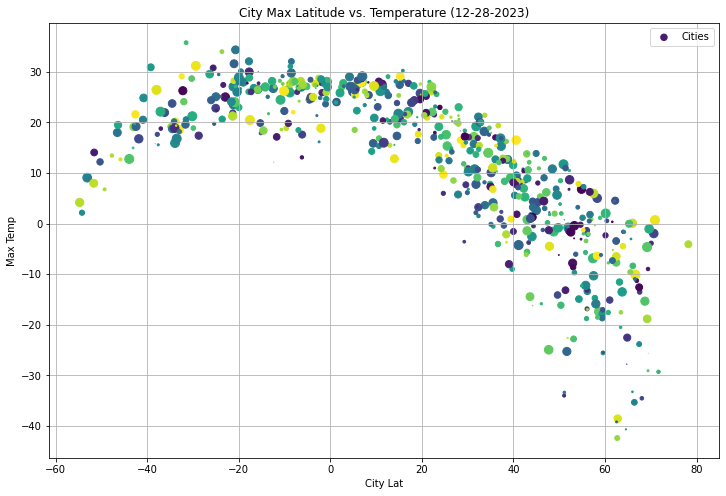

In [11]:
x=df['City Lat']
y=df['Max Temp']
N=len(df)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**1.3  # 0 to 15 point radii
df.plot.scatter(x='City Lat',y='Max Temp', c=colors, s=area, title='Latitude vs. Temp', grid=True, figsize=(12,8), label='Cities')
# plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%m-%d-%Y"))
plt.legend(loc='best')

# plt.title('Latitude vs. Temp')
plt.savefig("../images/lat_vs_temp_s.jpg")

# Show plot
# plt.show()

# Latitude vs. Humidity

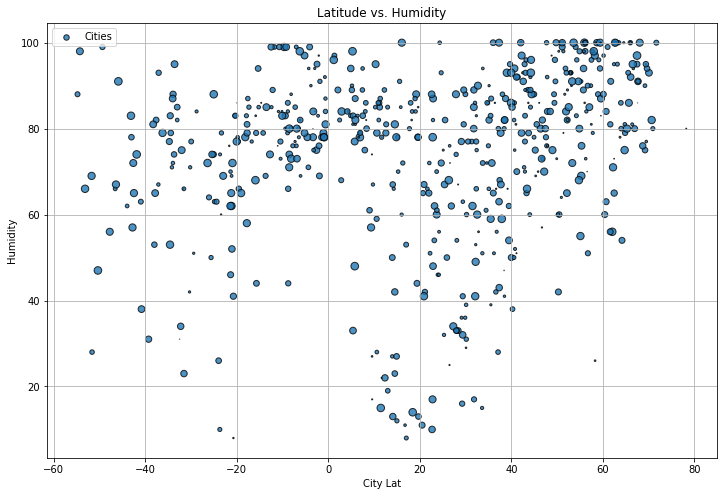

In [12]:

N=len(df)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**1.2  # 0 to 15 point radii
df.plot.scatter(x='City Lat',y='Humidity', edgecolor="black", linewidths=1, marker="o", alpha=0.8, s=area, title='Latitude vs. Humidity', grid=True, figsize=(12,8),label="Cities")


# plt.title('Latitude vs. Temp')
plt.savefig("../images/lat_vs_hum_s.jpg")

# Show plot
plt.show()

# Latitude vs. Cloudiness

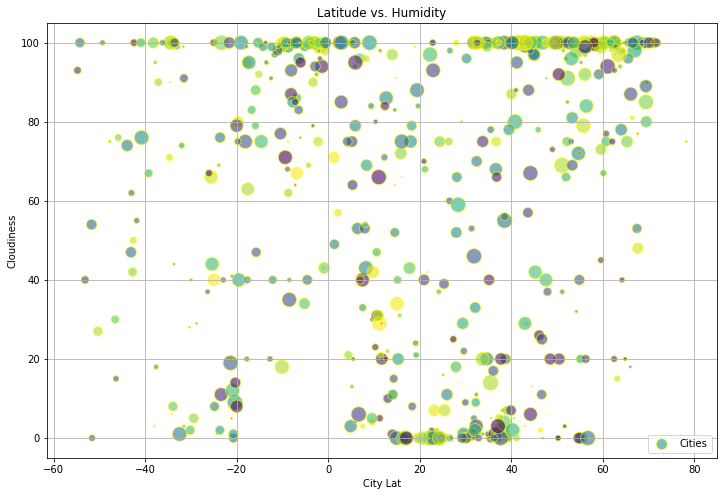

In [13]:

N=len(df)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**1.6  # 0 to 15 point radii
df.plot.scatter(x='City Lat',y='Cloudiness', edgecolor="yellow", c=colors, linewidths=1, marker="o", alpha=0.6, s=area, title='Latitude vs. Humidity', grid=True, figsize=(12,8),label="Cities")


# plt.title('Latitude vs. Temp')
plt.savefig("../images/lat_vs_clouds_s.jpg")

# Show plot
plt.show()

# Latitude vs. Wind Speed Plot

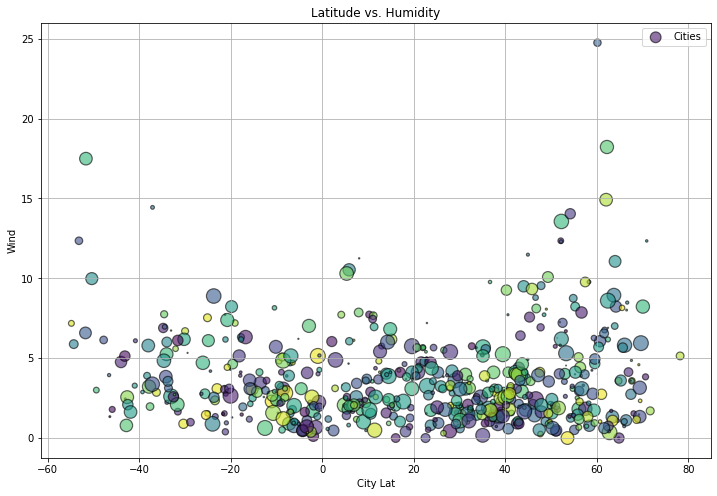

In [14]:
N=len(df)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**1.6  # 0 to 15 point radii
df.plot.scatter(x='City Lat',y='Wind', edgecolor="black", c=colors, linewidths=1.2, marker="o", alpha=0.6, s=area, title='Latitude vs. Humidity', grid=True, figsize=(12,8),label="Cities")


# plt.title('Latitude vs. Temp')
plt.savefig("../images/lat_vs_clouds_s.jpg")

# Show plot
plt.show()

# Southern Hemisphere DF

In [15]:
s_df=df.loc[df['City Lat']<=0]
s_df.sample(5)

,City Name,Country,City Lat,City Lon,Max Temp,Wind,Date,Humidity,Cloudiness,Description
City_ID,,,,,,,,,,
152,Lukolela,CD,-1.0605,17.1821,23.59,1.36,1703717261,79,43,scattered clouds
511,Chachapoyas,PE,-6.2317,-77.8690,13.06,0.95,1703717337,98,100,light rain
533,Masterton,NZ,-40.9597,175.6575,20.49,3.28,1703717341,63,100,overcast clouds
307,Belmonte,BR,-15.8631,-38.8828,26.47,3.62,1703717293,83,88,overcast clouds
433,Arraial do Cabo,BR,-22.9661,-42.0278,24.98,3.09,1703717321,69,40,scattered clouds


# Northern Hemisphere DF

In [16]:
n_df=df.loc[df['City Lat']>=0]
n_df.sample(5)

,City Name,Country,City Lat,City Lon,Max Temp,Wind,Date,Humidity,Cloudiness,Description
City_ID,,,,,,,,,,
89,Ramnagar,IN,29.4000,79.1167,11.85,1.61,1703717248,63,0,clear sky
342,Rongelap,MH,11.1635,166.8941,27.40,7.66,1703717301,86,29,scattered clouds
161,Mabaruma,GY,8.2000,-59.7833,25.17,2.18,1703717262,86,43,scattered clouds
454,Heyuan,CN,23.7333,114.6833,12.55,1.74,1703717325,61,34,scattered clouds
556,Lamar,US,33.6668,-95.5836,8.13,5.66,1703717346,51,20,few clouds


In [17]:
import seaborn as sns
from scipy import stats
sns.set_theme(color_codes=True)

In [18]:
def sns_reg_plot(x, y, dataframe, title ):

    # get coeffs of linear fit
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

    # use line_kws to set line label for legend
    ax = sns.regplot(x=x, y=y, data=dataframe, color='b', 
                     scatter_kws={"color": "black"},
                     line_kws={"color": "red",'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
    res = stats.linregress(x, y)
    print(f"R-squared: {res.rvalue**2:.6f}")
    ax.figure.set_size_inches(12, 9)
    # plot legend
    ax.legend()
    plt.title(title)
    ax.figure.savefig(f'../images/{title}.jpg')
    plt.show()



#  Temperature vs. Latitude Linear Regression Plot

R-squared: 0.715065


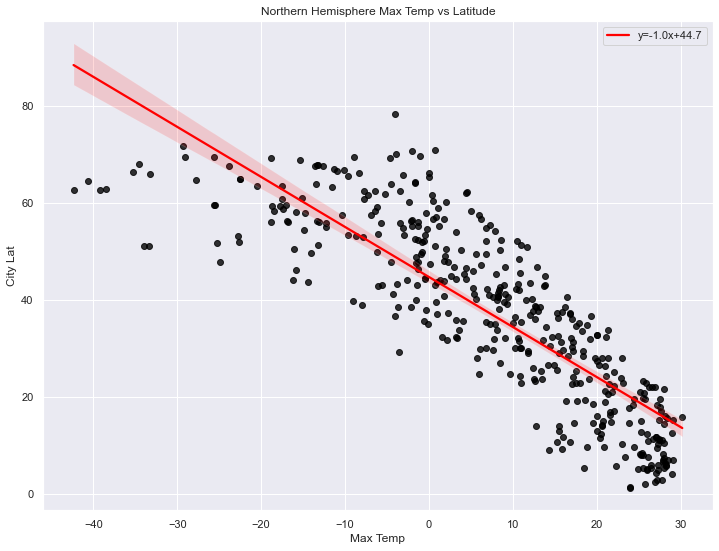

In [19]:
#Northern Hemisphere Temp vs Lat
x=n_df['Max Temp']
y=n_df['City Lat']
dataframe=n_df
title="Northern Hemisphere Max Temp vs Latitude"


sns_reg_plot(x, y, dataframe, title="Northern Hemisphere Max Temp vs Latitude")

R-squared: 0.315798


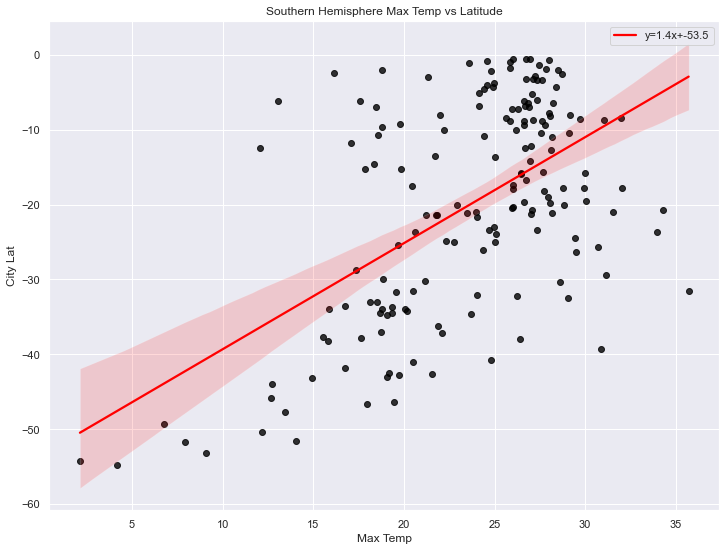

In [20]:
## SOUTHERN HEMISPHERE
x=s_df['Max Temp']
y=s_df['City Lat']
dataframe=s_df
title="Southern Hemisphere Max Temp vs Latitude"


sns_reg_plot(x, y, dataframe, title)

# Humidity vs. Latitude Linear Regression Plot

R-squared: 0.125418


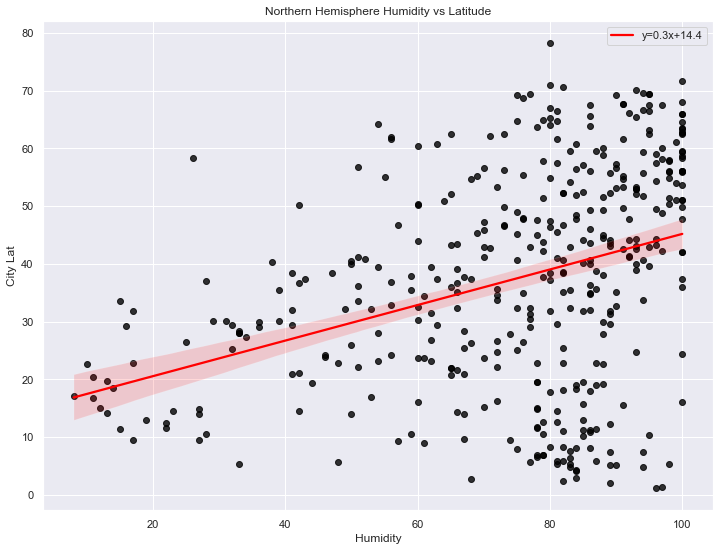

In [21]:
x=n_df['Humidity']
y=n_df['City Lat']
dataframe=n_df
title="Northern Hemisphere Humidity vs Latitude"


sns_reg_plot(x, y, dataframe, title)

R-squared: 0.115347


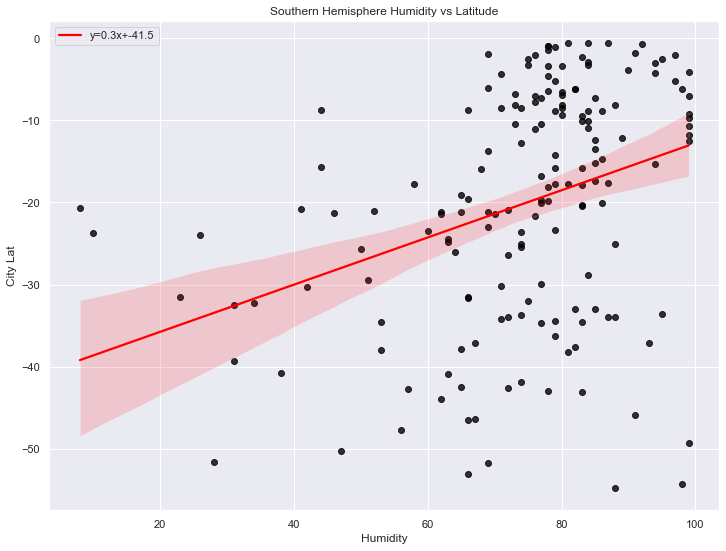

In [22]:
x=s_df['Humidity']
y=s_df['City Lat']
dataframe=n_df
title="Southern Hemisphere Humidity vs Latitude"


sns_reg_plot(x, y, dataframe, title)

# Cloudiness vs. Latitude Linear Regression Plot

R-squared: 0.141296


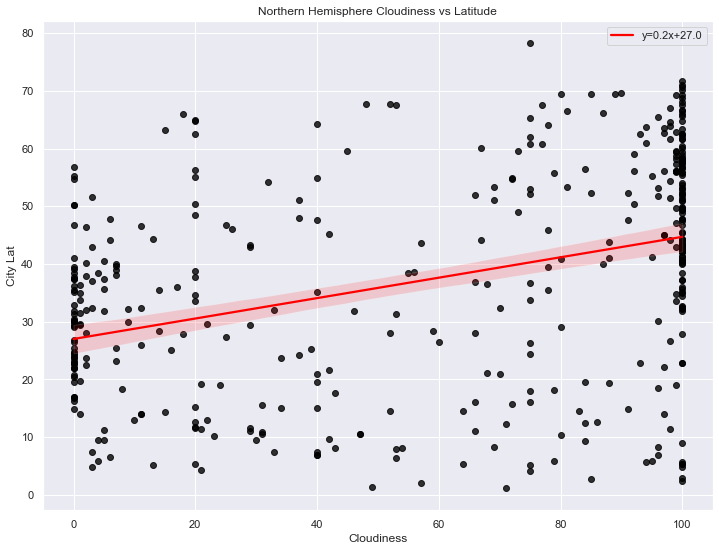

In [23]:
# Linear regression on Northern Hemisphere
x=n_df['Cloudiness']
y=n_df['City Lat']
dataframe=n_df
title="Northern Hemisphere Cloudiness vs Latitude"


sns_reg_plot(x, y, dataframe, title)

R-squared: 0.091769


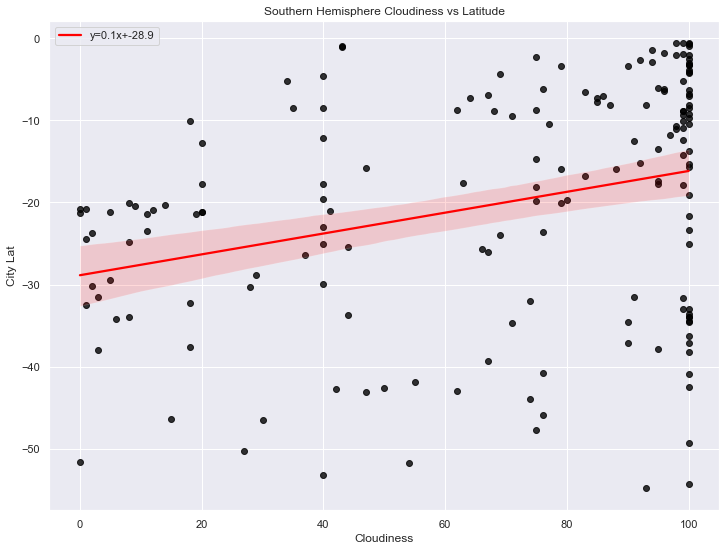

In [24]:
# Linear regression on Southern Hemisphere

x=s_df['Cloudiness']
y=s_df['City Lat']
dataframe=n_df
title="Southern Hemisphere Cloudiness vs Latitude"


sns_reg_plot(x, y, dataframe, title)

# Wind Speed vs. Latitude Linear Regression Plot

R-squared: 0.017570


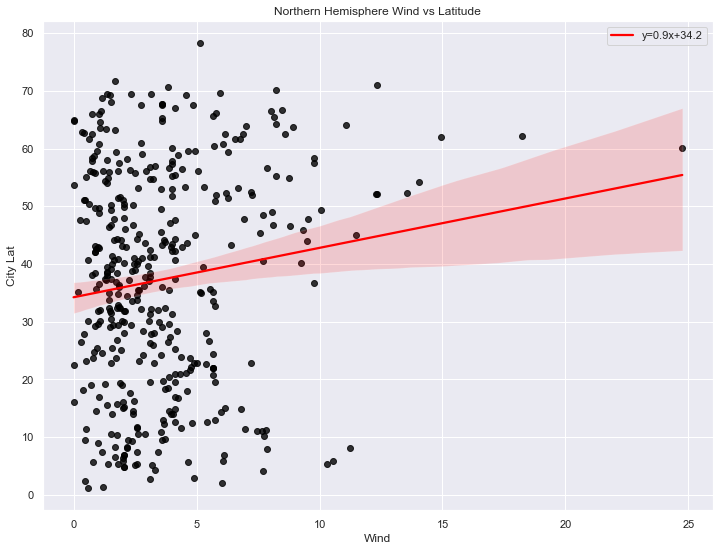

In [25]:

# Linear regression on Northern Hemisphere
x=n_df['Wind']
y=n_df['City Lat']
dataframe=n_df
title="Northern Hemisphere Wind vs Latitude"


sns_reg_plot(x, y, dataframe, title)

R-squared: 0.161470


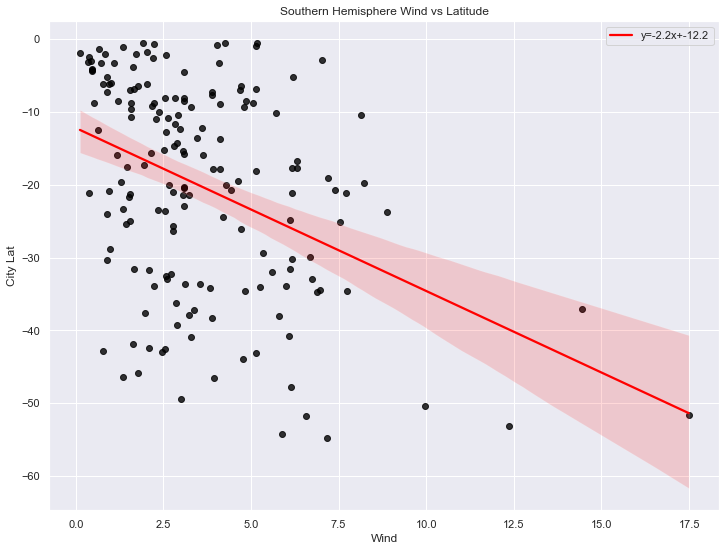

In [26]:
# Linear regression on Southern Hemisphere
x=s_df['Wind']
y=s_df['City Lat']
dataframe=s_df
title="Southern Hemisphere Wind vs Latitude"


sns_reg_plot(x, y, dataframe, title)

### Two other function options - matplotlib only: 

In [27]:
# # Function to call on various scatter plot combinations

# def scatter_plotter(x, y, title):
#     (temp_slope, temp_intercept, temp_r_val, _, _) = linregress(x, y)

#     temp_axes = plt.scatter(x, y,) 
#     plt.title(title)                                   
#     regr_line_x = x * temp_slope + temp_intercept
    
#     plt.plot(x,regr_line_x,"r-")
  

#     print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}"
#           .format(temp_slope, temp_intercept))
#     print("The r-squared correlation coefficient for this line is {:.2f}".format(temp_r_val))
#     temp_axes.get_figure().savefig(f"output/{title}.jpg")

In [28]:
# Define a function to create Linear Regression plots
# def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
#     # Compute linear regression
#     (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#     regress_values = x_values * slope + intercept
#     line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#     # Plot
#     plt.scatter(x_values,y_values)
#     plt.plot(x_values,regress_values,"r-")
#     plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
#     plt.xlabel("Latitude")
#     plt.ylabel(title)
#     print(f"The r-value is: {rvalue**2}")
#     plt.show()